<a href="https://colab.research.google.com/github/Naresh-18/Colab-Notes/blob/Autoencoder/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import keras
from keras import callbacks
from keras.models import Model
from keras.optimizers import Adadelta
from keras.layers import Input,Conv2D,MaxPool2D,UpSampling2D

In [ ]:
import numpy as np
(trainX,trainy),(testX,testy)=mnist.load_data()
trainX=np.expand_dims(trainX,axis=-1)
testX=np.expand_dims(testX,axis=-1)
trainX=trainX.astype("float32")/255.0
testX=testX.astype("float32")/255.0

In [ ]:
trainNoise=np.random.normal(loc=0.5,scale=0.5,size=trainX.shape)
testNoise=np.random.normal(loc=0.5,scale=0.5,size=testX.shape)
trainXNoisy=np.clip(trainX+trainNoise,0,1)
testXNoisy=np.clip(testX+testNoise,0,1)

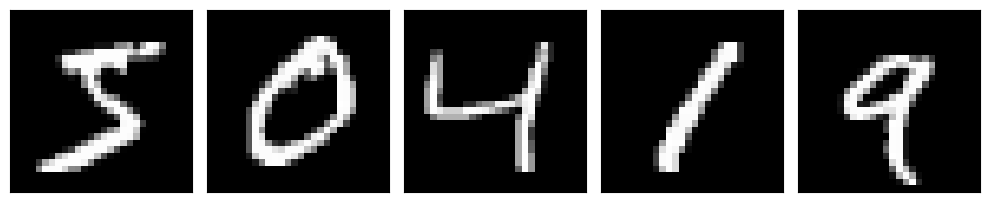

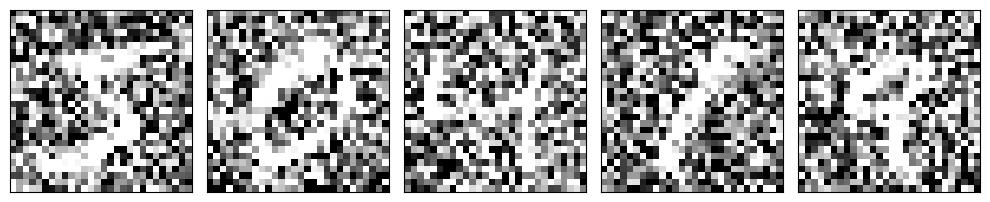

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i].reshape(28,28),cmap='gray')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainXNoisy[i].reshape(28,28),cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
input_img=Input(shape=(28,28,1))
X=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
X=MaxPool2D((2,2),padding='same')(X)
X=Conv2D(32,(3,3),activation='relu',padding='same')(X)
encoded=MaxPool2D((2,2),padding='same')(X)
X=Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
X=UpSampling2D((2,2))(X)
X=Conv2D(32,(3,3),activation='relu',padding='same')(X)
X=UpSampling2D((2,2))(X)

decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(X)
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1453 - val_loss: 0.1436
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1450 - val_loss: 0.1433
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1447 - val_loss: 0.1430
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1444 - val_loss: 0.1427
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1441 - val_loss: 0.1424
Epoch 6/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1438 - val_loss: 0.1422
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1436 - val_loss: 0.1419
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1433 - val_loss: 0.1416
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1430 - val_loss: 0.1414
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1

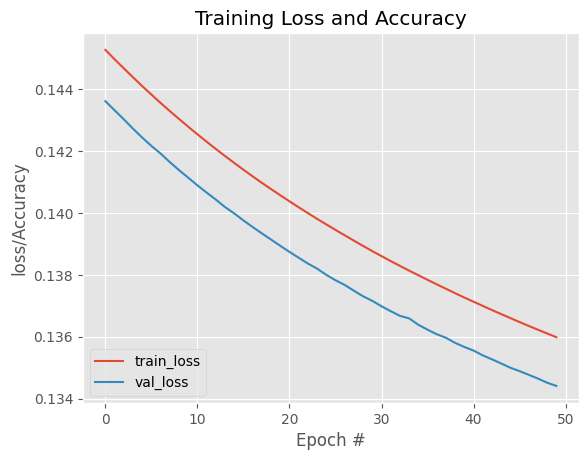

In [ ]:
H=autoencoder.fit(trainXNoisy,trainX,
                  validation_data=(testXNoisy,testX),
                  epochs=50,
                  batch_size=32)
N=np.arange(0,50)
plt.style.use("ggplot")
plt.figure
plt.plot(N,H.history["loss"],label="train_loss")
plt.plot(N,H.history["val_loss"],label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

313/313 [==============================] - 1s 2ms/step


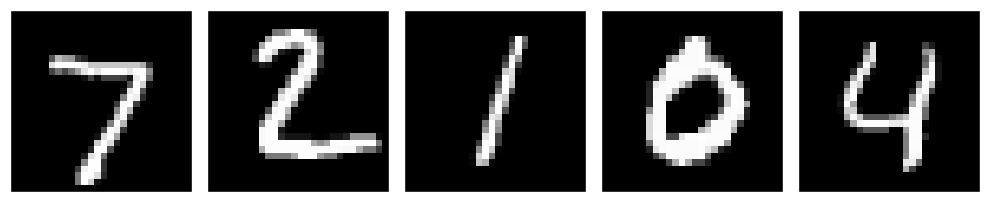

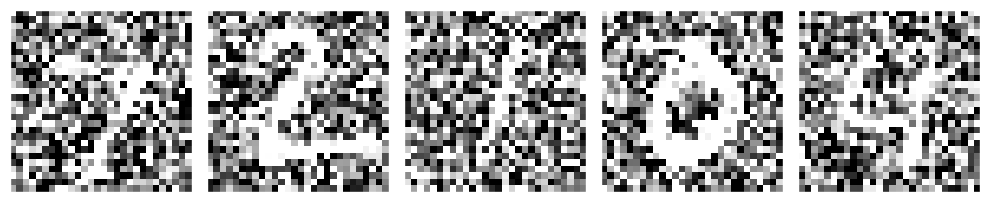

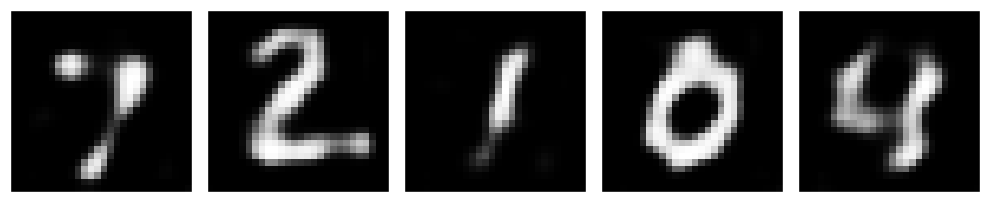

In [ ]:
pred=autoencoder.predict(testXNoisy)
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(testX[i].reshape(28,28),cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(testXNoisy[i].reshape(28,28),cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(pred[i].reshape(28,28),cmap='gray')
plt.tight_layout()
plt.show()